
# Poisson Distribution

## What is Poisson Distribution?
Poisson distribution is a discrete probability distribution with a parameter λ. The distribution indicates a probability of k events occur in an interval given a rate of occurrences (λ). In other words, we can use Poisson distribution to find a probability that k events happen in an interval with a specific rate of occurrences.


## Where does the formula come?

The concept of **Poisson distribution** is similar to the **binomial distribution**. In **binomial distribution**, the distribution indicates a probability that *k* events occur or successful in *n* trials with the following equation.

**$P(X = k) = \frac{n!}{k!(n-k)!}p^{k}(1-p)^{n-k}$**

Where *n* is a number of trails, *k* is a number of successful events, and *p* is a probability of successful events.

this can be expressed as well:

**$P(X = k) = \frac{{}_{n} C_{k}}{(1/p)^{n}} $**

Where **$(1/p)$** is the total options in binomial distribution (and i think, in every discrete distributions).

We can change this equation to **Poisson’s probability mass** function. Let’s *τ* be an interval (a range of time), *δ* be a sub-interval (a small range of time inside *τ*), and *λ* be a rate of successful events in an interval. So, *n* is a number *δ* of in *τ* and *p* is *λδ*

**$n = \frac{τ}{δ}$** and **$ λδ = λ \frac{τ}{n}$**

Before we put these formulas in the **binomial’s probability mass** function, There are a few things I want to mention. You can think of *τ* as a foot ruler, and *δ* is an inch scale, so *n* is 12. If we fix and increase *n*, *δ* will decrease. From **binomial distribution**, in a single trial, the event can occur exactly one event or no event occur. Thus, in a tiny sub-interval *δ*, only one event either occurs or not occur. This is one of the properties of **Poisson distribution**.

If we plug these formulas in the **binomial’s probability mass** function, we will get the following equation.

**$P(X = k) = \frac{n!}{k!(n-k)!} (λ \frac{τ}{n})^{k} (1 - λ \frac{τ}{n})^{n - k}$**

Then take a limit of *n* as it goes to infinity. We will get a **Poisson’s probability** mass function.

**$P(X = k) = \frac{(λτ)^{k} e^{-λτ}}{k!}$**

Where *k* is a number of successful events (*k* greater than or equal to 0), is an interval ( greater than 0), is a rate of successful events ( greater than 0).

Here is another [proof link](https://medium.com/@andrew.chamberlain/deriving-the-poisson-distribution-from-the-binomial-distribution-840cc1668239) without using τ


## Comparing with the binomial distribution

When *n* is significantly larger than *k*, the **Poisson distribution** is similar to the **binomial distribution**.

I create a **binomial distribution** with *n* = 150 and *p* = 0.05

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, factorial

max probability 0.14989080013984135
probability peak at k = 7
sum of all probability = 0.9999998724219421
np: 7.5


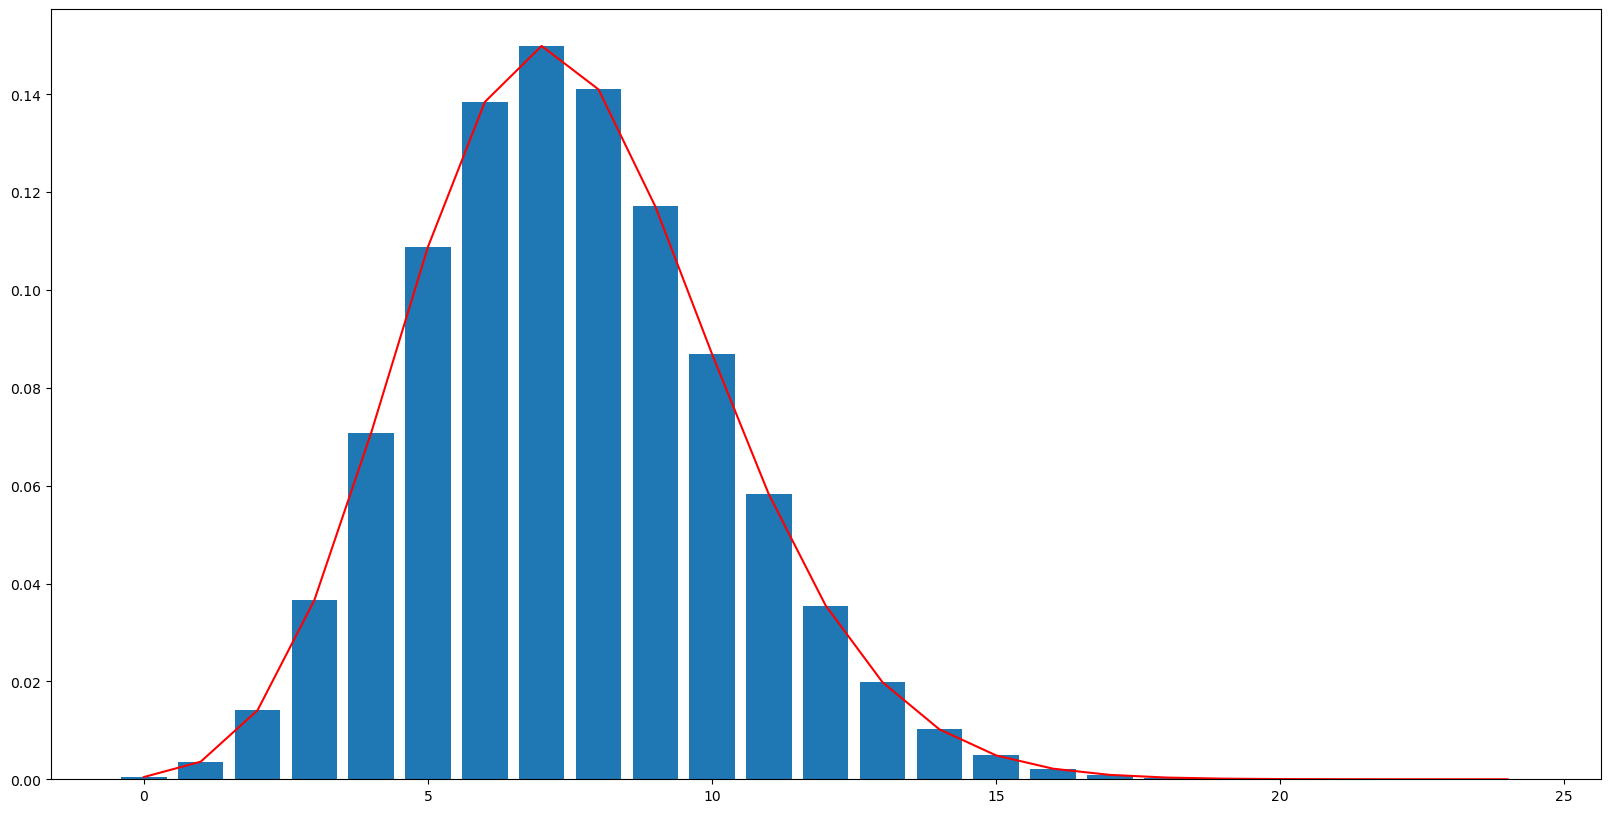

In [14]:
### Compare binomial with poisson
# list of probabilities for y-axis
problist = []
# list of number of event for x-axis
klist = []
# number of trials
n = 150
# probability of success in each trial
p = 0.05
# probability of not success in each trial
q = 1 - p
# compute for 25 event
for i in range(0,25):
    # k = number of success events
    k = i
    # add to klist
    klist.append(k)
    # calculate the probability and add to list
    problist.append((factorial(n)/(factorial(k)*factorial(n-k)))*(p**k)*(q**(n-k)))
    
# print result
print("max probability",max(problist))
print("probability peak at k =",problist.index(max(problist)))
print("sum of all probability =",sum(problist))
print("np:", n*p)

# plot graph
plt.figure(figsize=(20,10))
plt.bar(klist,problist)
plt.plot(problist,color="red")
plt.show()

Then, I create a Poisson distribution with *τ = 150* and *λ = 0.05*

max probability 0.14648383216413616
probability peak at k = 7
sum of all probability = 0.9999996250210755
np: 7.5


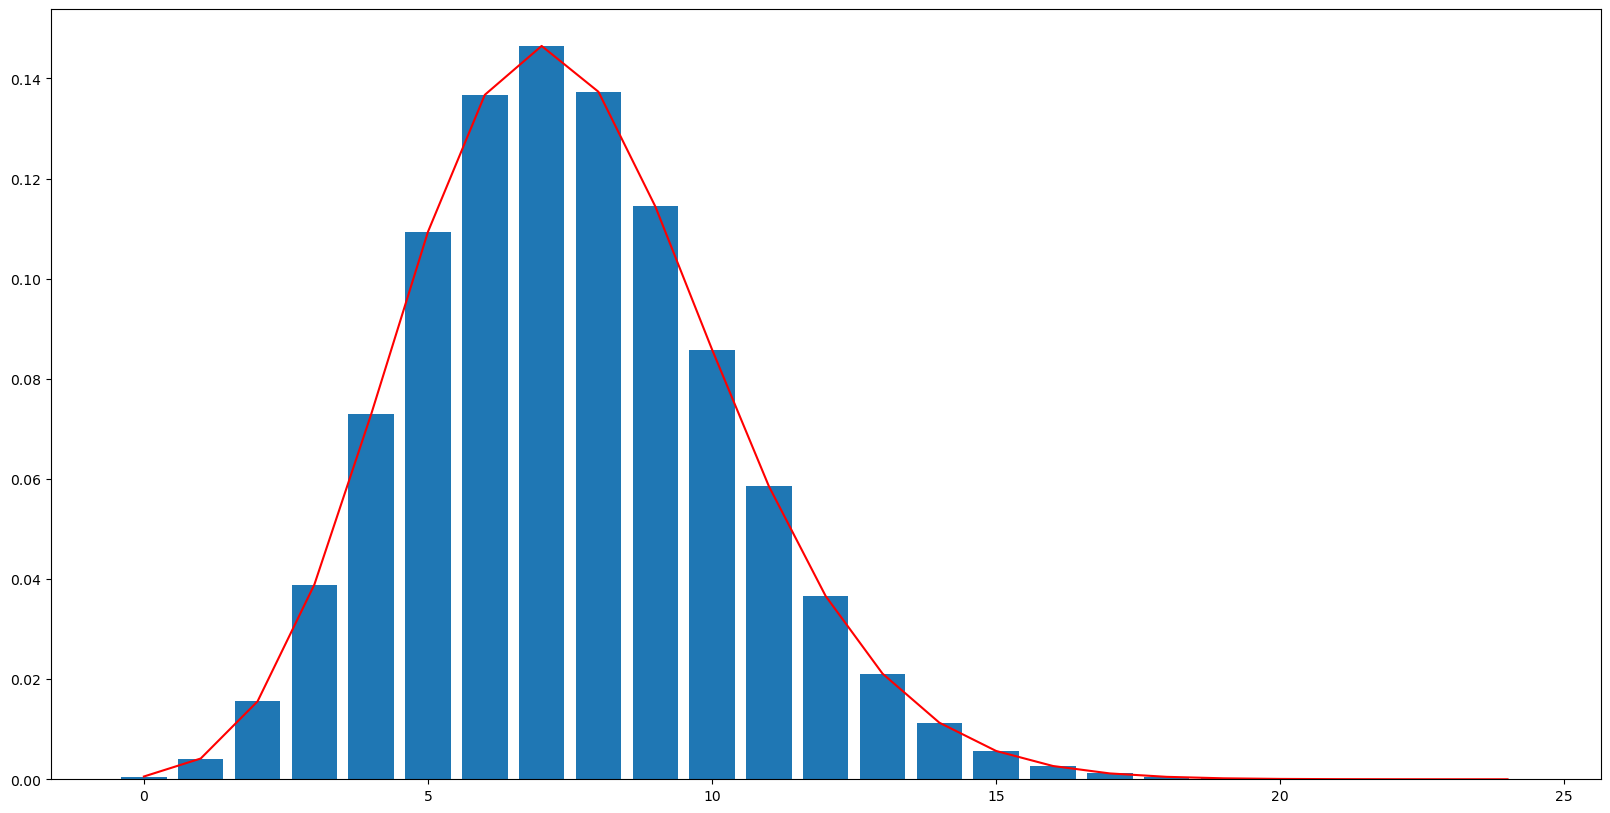

In [15]:
### Compare binomial with poisson
# list of probabilities for y-axis
problist = []
# list of number of event for x-axis
klist = []
# number of intervals
tau = 150
# rate of success in each interval
lamda = 0.05
# compute for 25 event
for i in range(0,25):
    # k = number of success events
    k = i
    # add to klist
    klist.append(k)
    # calculate the probability and add to list
    problist.append((((lamda*tau)**k)*exp((-lamda)*tau))/factorial(k))
    
# print result
print("max probability",max(problist))
print("probability peak at k =",problist.index(max(problist)))
print("sum of all probability =",sum(problist))
print("np:", lamda*tau)

# plot graph
plt.figure(figsize=(20,10))
plt.bar(klist,problist)
plt.plot(problist,color="red")
plt.show()


We can see that the graph is similar. The **Poisson distribution** can be a good approximation of the binomial distribution. The approximation will be the most effective when *n ≥ 100* and *np ≤ 10*.

You might have heard that *λ = np*, that is also correct. The reason why I use *λ = p* will be explained on the " **Poisson distribution** with many intervals” section.

## Poisson distribution

Now that you know where the distribution comes from, you might notice that the probability mass function is a bit different from the one you have seen before. If you take an equation above and set *τ* to 1, you will get this.

**$ P(X = k) = \frac{λ^{k}e^{-λ}}{k!}$**

This equation can calculate the probability of *k* events in 1 interval.

Before we create a **Poisson distribution**, there are a few rules we have to consider.

In a tiny sub-interval, either exactly one event occurs, or no event occurs.
A rate of occurrence has to be constant.
Each event is independent of each other.
Now we can create a **Poisson distribution**. Suppose I live on a farm, and shepherding is dull, so I am interested in a number of airplanes that fly over my farm. I check a flight schedule of a nearby airport and find that on average, there is an aircraft flies over my farm in 4 hours.

I will set *τ* to 1 and use the equation everyone familiar with first, and then I will use the equation with parameter *τ*.

From the information above, if an interval is an hour, the rate of occurrence or *λ* is 0.25. I use python to create a graph.

max probability 0.7788007830714049
probability peak at k = 0
sum of all probability = 0.9999999999997906


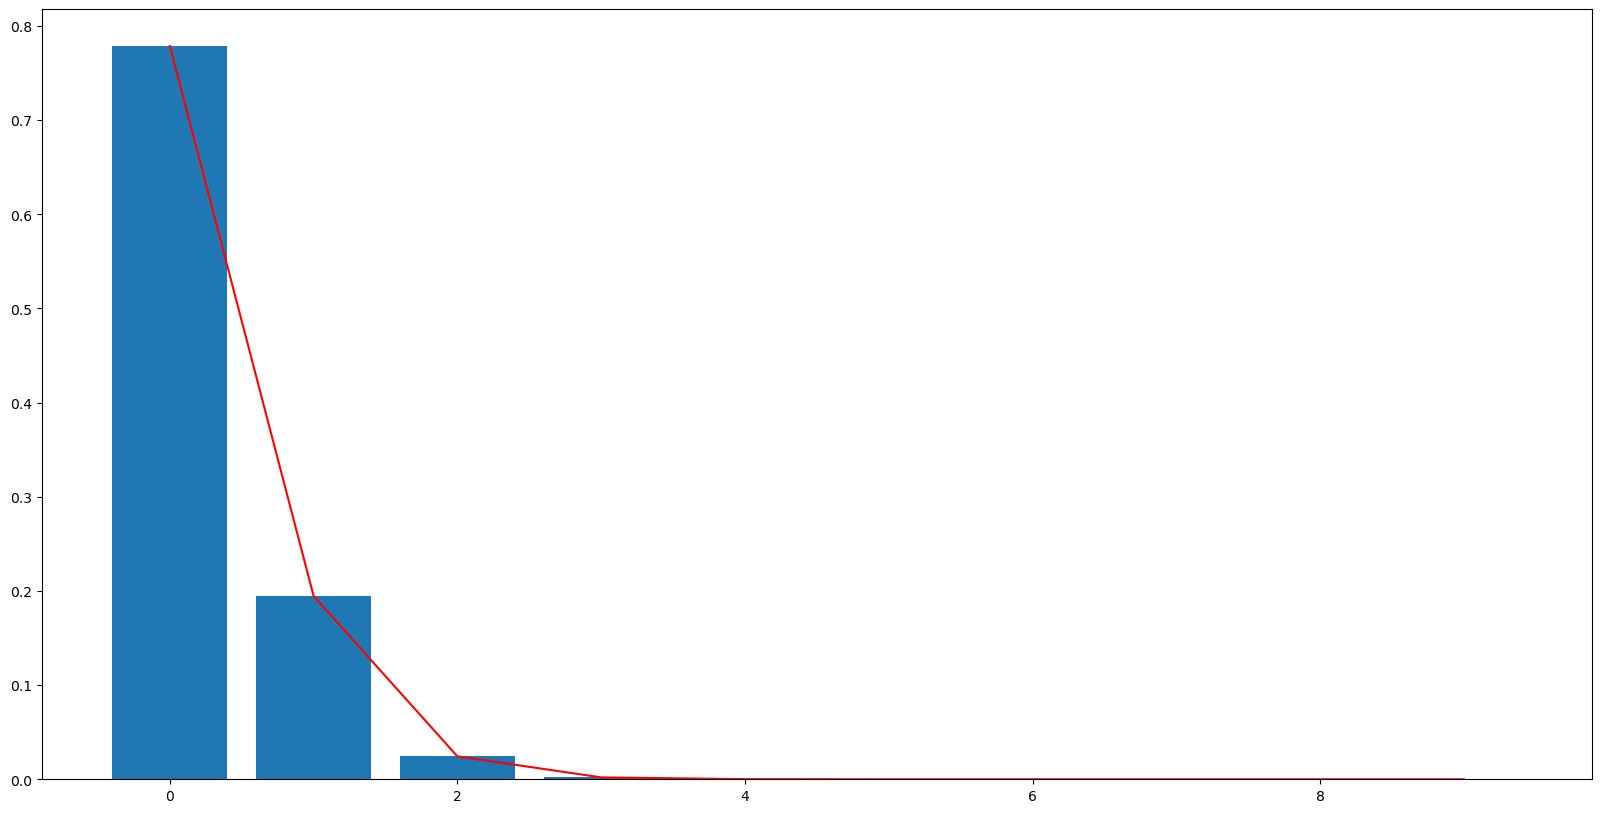

In [16]:
### use example of airplanes
## on average an airplane comes every 4 hour
# lamda = rate of ouccurance = 1 in 4 hour = 0.25 in an hour
# list of probabilities for y-axis
problist = []
# list of number of event for x-axis
klist = []
# rate of success in each interval
lamda = 0.25
# compute for 10 event
for i in range(0,10):
    # k = number of success events
    k = i
    # add to klist
    klist.append(k)
    # calculate the probability and add to list
    problist.append((((lamda)**k)*exp((-lamda)))/factorial(k))
    
# print result
print("max probability",max(problist))
print("probability peak at k =",problist.index(max(problist)))
print("sum of all probability =",sum(problist))

# plot graph
plt.figure(figsize=(20,10))
plt.bar(klist,problist)
plt.plot(problist,color="red")
plt.show()

Figure note: the x-axis is numbers of events, the y-axis is probabilities.

I use a bar graph because Poisson distribution is a discrete distribution. The red line represents the trend of probabilities of events.


## Poisson distribution with many intervals
If we want to know the probability distribution of 4 hours, there is two way to deal with that.

First, we can change the time frame. On average, there is only one airplane that flies over my farm in 4 hours, so the rate of occurrences (*λ*) is 1. You can use a number of intervals multiple with the rate of occurrences (*λτ*) as a new rate of occurrences (*λ*).

max probability 0.36787944117144233
probability peak at k = 0
sum of all probability = 0.9999998885745216


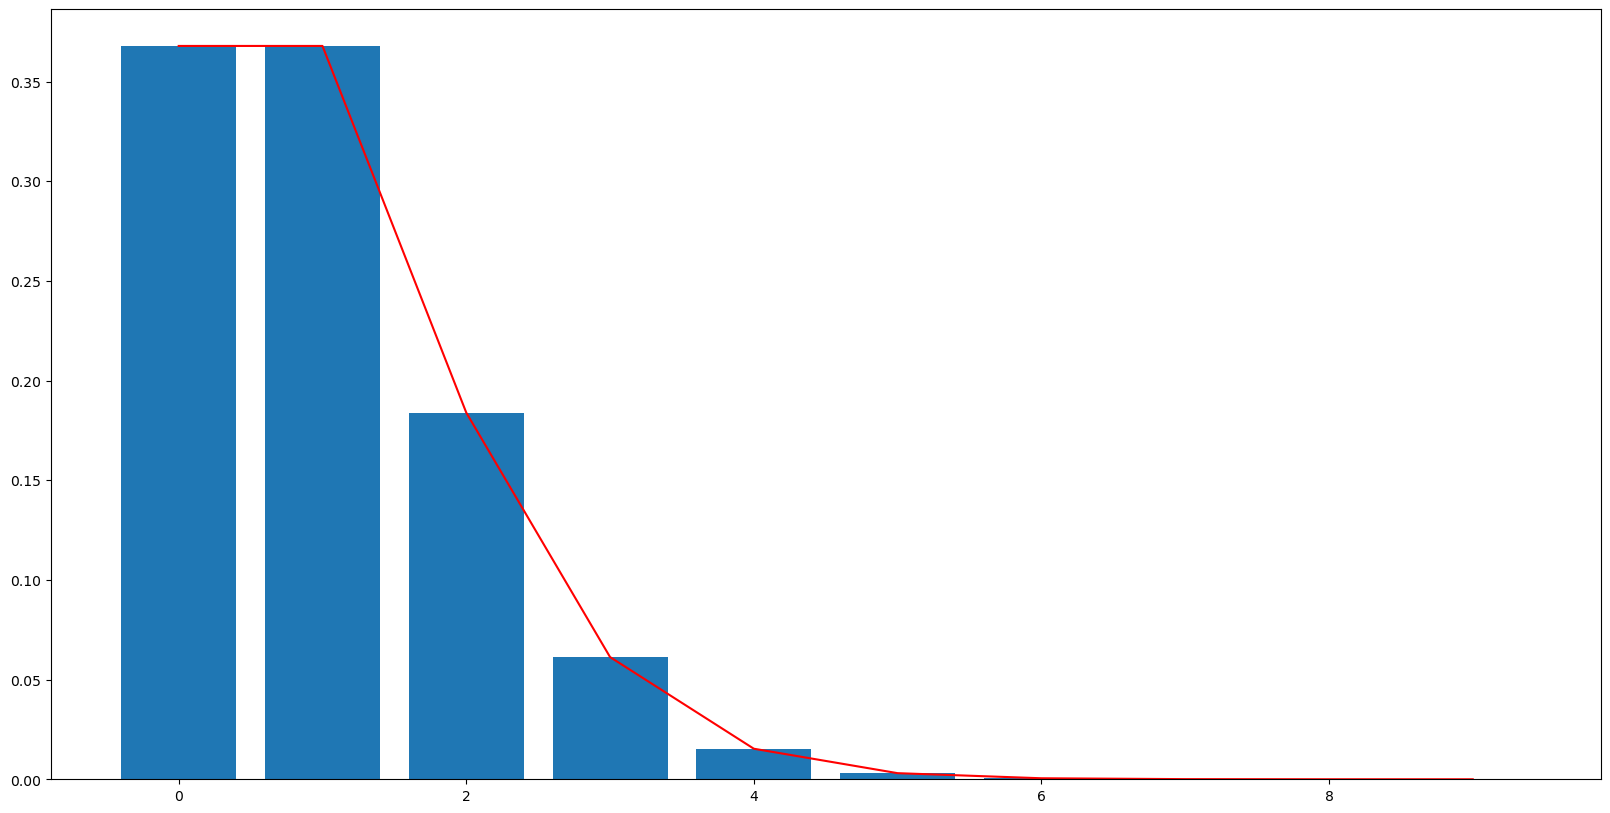

In [17]:
### use example of airplanes
## on average an airplane comes every 4 hour
# lamda = rate of ouccurance = 1 in 4 hour = 0.25 in an hour
# list of probabilities for y-axis
problist = []
# list of number of event for x-axis
klist = []
# number of intervals
tau =  4
# rate of success in each interval
lamda = 0.25
# adjusted rate of occurrences
lamda = lamda*tau # now lamda = 1, one airplane in 4 hour
# compute for 20 event
for i in range(0,10):
    # k = number of success events
    k = i
    # add to klist
    klist.append(k)
    # calculate the probability and add to list
    problist.append((((lamda)**k)*exp((-lamda)))/factorial(k))
    
# print result
print("max probability",max(problist))
print("probability peak at k =",problist.index(max(problist)))
print("sum of all probability =",sum(problist))

# plot graph
plt.figure(figsize=(20,10))
plt.bar(klist,problist)
plt.plot(problist,color="red")
plt.show()

Second, we can use an equation with which is this one.

**$P(X = k) = \frac{(λτ)^{k}e^{-λτ}}{k!}$**

We use the same *λ* which is 0.25 (rate of occurrence in one hour) and set τ to 4 (set time frame to be 4 hours).

max probability 0.36787944117144233
probability peak at k = 0
sum of all probability = 0.9999998885745216


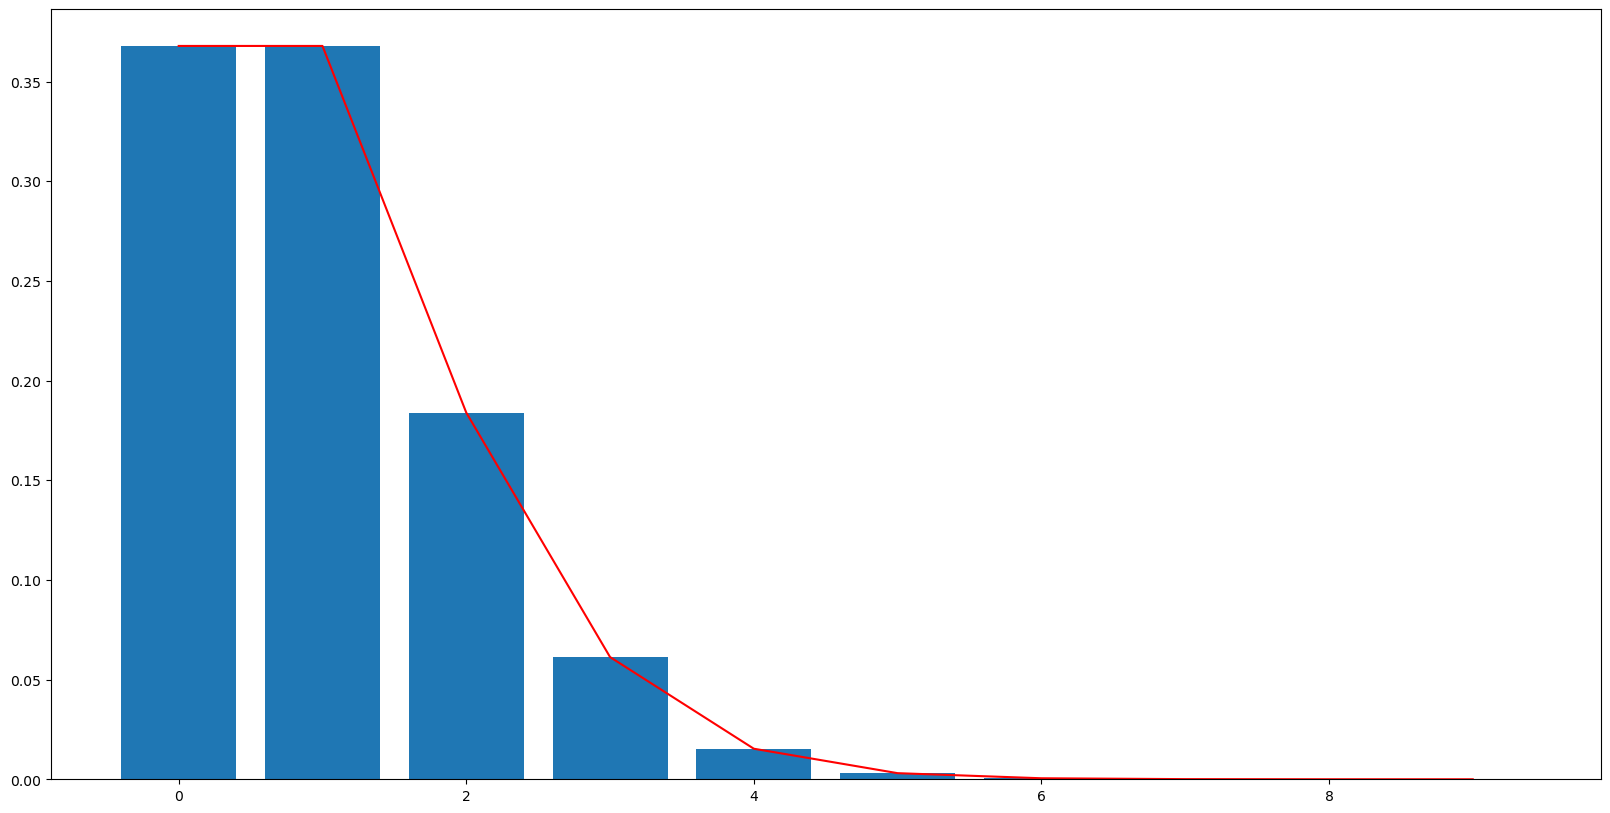

In [18]:
### use example of airplanes
## on average an airplane comes every 4 hour
# lamda = rate of ouccurance = 1 in 4 hour = 0.25 in an hour
# list of probabilities for y-axis
problist = []
# list of number of event for x-axis
klist = []
# number of intervals
tau =  4
# rate of success in each interval
lamda = 0.25 
# compute for 20 event
for i in range(0,10):
    # k = number of success events
    k = i
    # add to klist
    klist.append(k)
    # calculate the probability and add to list
    problist.append((((lamda*tau)**k)*exp((-lamda*tau)))/factorial(k))
    
# print result
print("max probability",max(problist))
print("probability peak at k =",problist.index(max(problist)))
print("sum of all probability =",sum(problist))

# plot graph
plt.figure(figsize=(20,10))
plt.bar(klist,problist)
plt.plot(problist,color="red")
plt.show()


We have the same result. In my opinion, the equation with *τ* is more flexible. We can change the time frame without calculating a new *λ*.

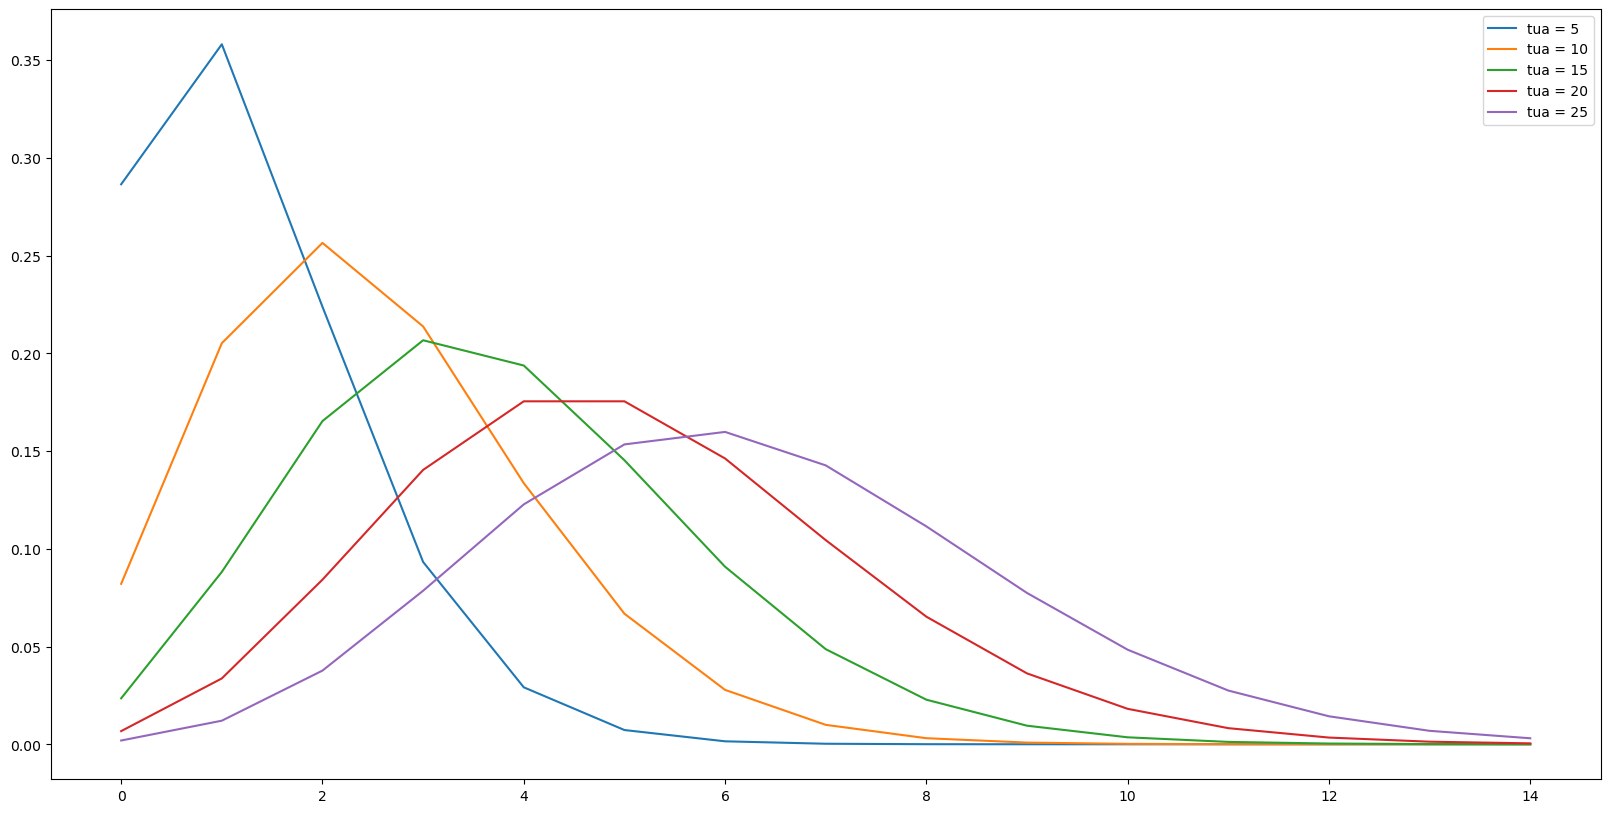

In [19]:
### use example of airplanes
## on average an airplane comes every 4 hour
# lamda = rate of ouccurance = 1 in 4 hour = 0.25 in an hour
# plot graph
plt.figure(figsize=(20,10))
# rate of success in each interval
lamda = 0.25
# list of tau for legend
tlist = []
# use 5 to 25 interval
for t in range(5,26,5):
    # list of probabilities for y-axis
    problist = []
    # list of number of event for x-axis
    klist = []
    # number of intervals
    tau =  t
    # collect each tau for legend
    tlist.append('tua = ' + str(t))
    # compute for 15 event
    for i in range(0,15):
        # k = number of success events
        k = i
        # add to klist
        klist.append(k)
        # calculate the probability and add to list
        problist.append((((lamda*tau)**k)*exp((-lamda*tau)))/factorial(k))
    # plot
    plt.plot(problist)

plt.legend(labels = tlist)
plt.show()

Figure note: The line graphs are for illustration, the Poisson distribution is a discrete distribution.


## What is Exponential Distribution?

The exponential distribution is a continuous probability distribution. The distribution is used to find a probability that an event will occur at a specific time. In other words, the probability of waiting time.

The concept of the exponential distribution is similar to the geometric distribution. If we are interested in a probability that k events occur at t time. We can calculate the probability by multiplying a probability that k-1 events occur between 0 to t with a probability that an event occurs on the t. However, the method is complicated because time is continuous, so we have to use integration. Anyway, the equation for the probability distribution function is the following.

**$P(X = t) = \frac{λ^{k}t^{k-1}e^{-λt}}{(k-1)!}$**

Where t = time, λ is a rate of occurrence, and k = number of events. Notice that this equation is Erlang’s probability density function.

Then if we set k = 1, which means only one event occurs in time t, we will get.

**$P(X = t) = λe^{-λt}$**

This is a probability density function of an exponential distribution. P is a probability that the first event occurs on t times.

You can find the alternative derivation of exponential distribution on this [link](https://towardsdatascience.com/what-is-exponential-distribution-7bdd08590e2a).


## Exponential distribution

From the same example, After I saw an airplane flew over my farm, I wonder how long I have to wait until the next airplane comes. I can use the exponential distribution with that.


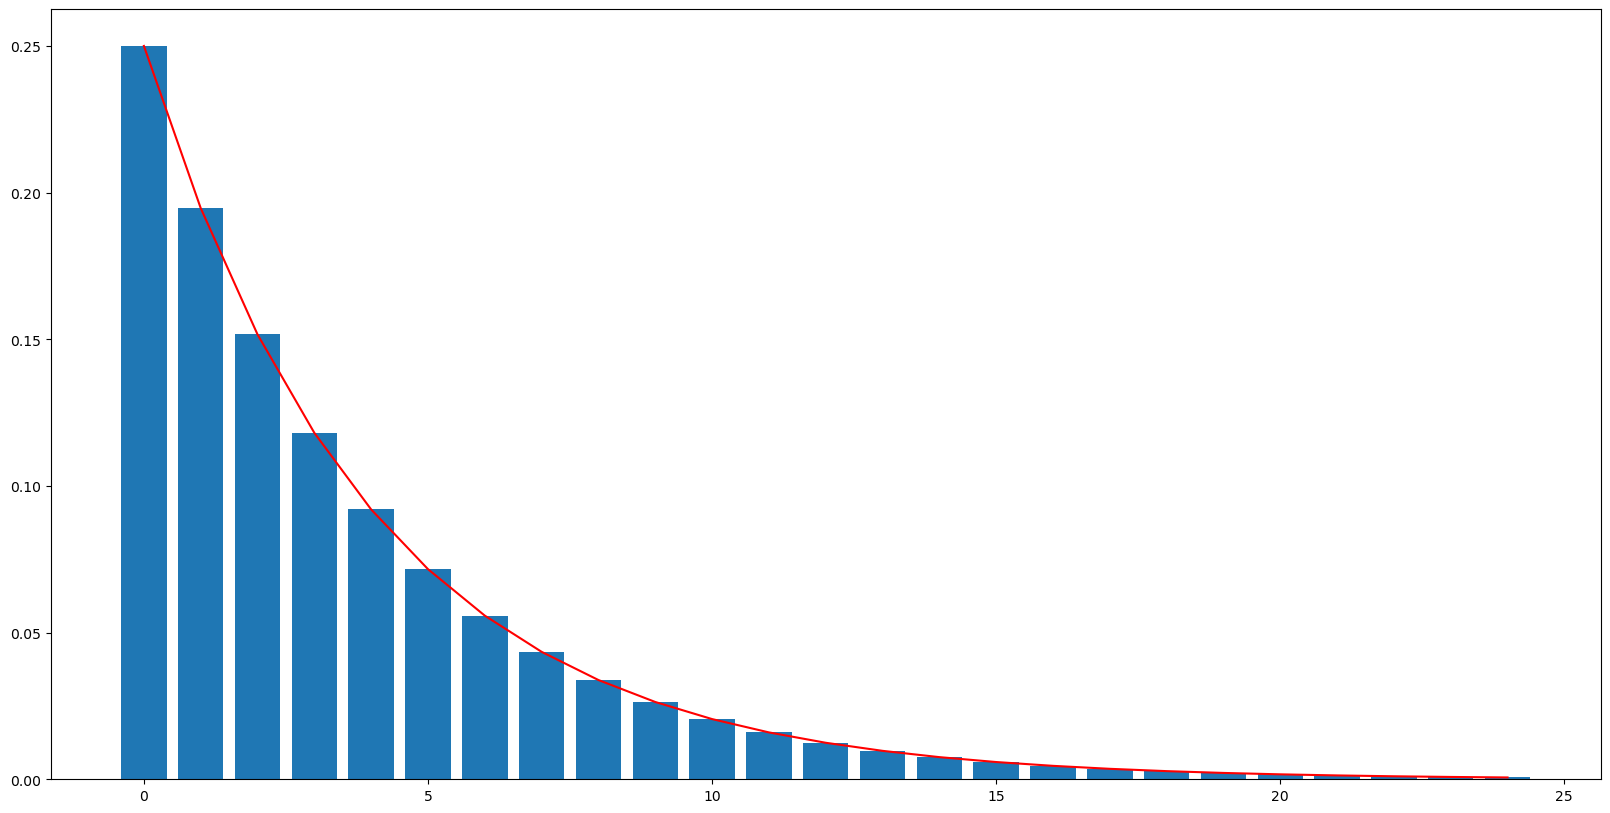

In [20]:
### use example of airplanes
## on average an airplane comes every 4 hour
# lamda = rate of ouccurance = 1 in 4 hour = 0.25 in an hour
# list of probabilities for y-axis
problist = []
# list of number of interval for x-axis
xlist = []
# rate of success in each interval
lamda = 0.25
# compute time from 0 hour to 24 hours
for i in range(0,25):
    # x = number of hours
    x = i
    # add to xlist
    xlist.append(x)
    # calculate the probability and add to list
    problist.append(((lamda)*exp((-lamda)*x)))
    
# plot
plt.figure(figsize=(20,10))
plt.bar(xlist,problist)
plt.plot(problist,color="red")
plt.show()

Figure note: Even though I use a bar graph, the distribution is continuous.

The graph does not depict insightfully. If I want to know the probability that I have to wait for 4 hours, I can read from the chart. However, it is not practical. The question should be what is a probability that I will see an airplane within 4 hours. The answer to this question will include the probabilities before 4 hours, which is more insightful.

We can answer that question with a cumulative distribution function of an exponential distribution.

**$P(X≤t) = 1 - e^{-λt}$**

Where t = time, λ is a rate of occurrence.

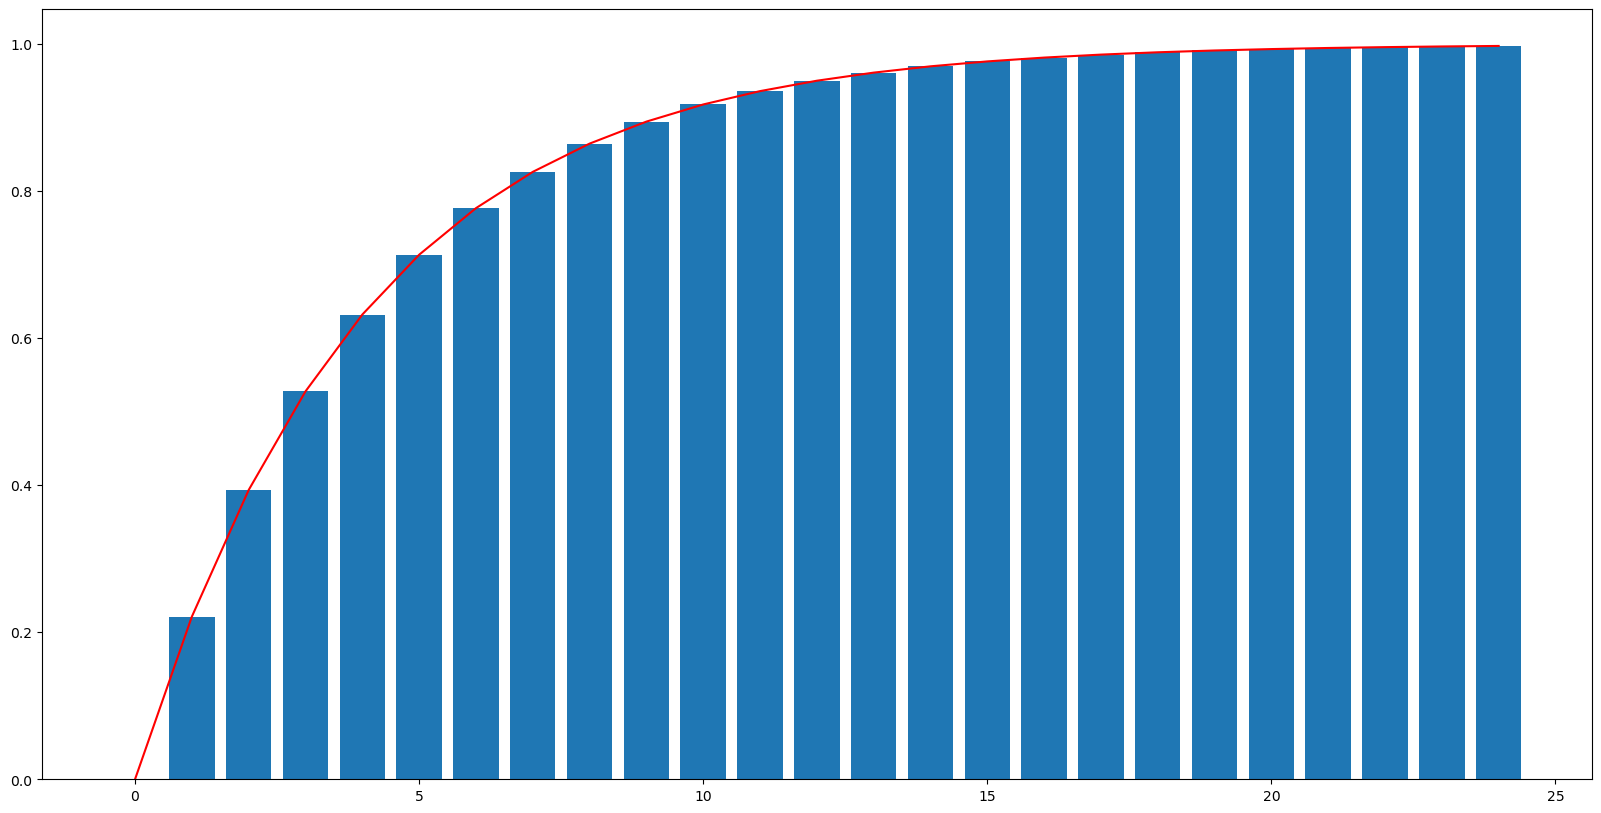

In [21]:
### use example of airplanes
## on average an airplane comes every 4 hour
# lamda = rate of ouccurance = 1 in 4 hour = 0.25 in an hour
# list of probabilities for y-axis
problist = []
# list of number of event for x-axis
xlist = []
# rate of success in each interval
lamda = 0.25
# compute time from 0 hour to 24 hours
for i in range(0,25):
    # x = number of hours
    x = i
    # add to xlist
    xlist.append(x)
    # calculate the probability and add to list
    problist.append((1 - exp((-lamda)*x)))
    
# plot
plt.figure(figsize=(20,10))
plt.bar(xlist,problist)
plt.plot(problist,color="red")
plt.show()

We can see the probability of an airplane coming within t time from the graph. If I have to leave my farm within 4 hours, I will know how much I can expect to see an airplane.


## Erlang distribution
We can use Erlang distribution to find a probability that k events occur at t time by using the following equation.

**$P(X = t) = \frac{λ^{k}t^{k-1}e^{-λt}}{(k-1)!}$**

max probability 0.04884170370329114
probability peak at x = 16
sum of all probability = 0.9992215932454258


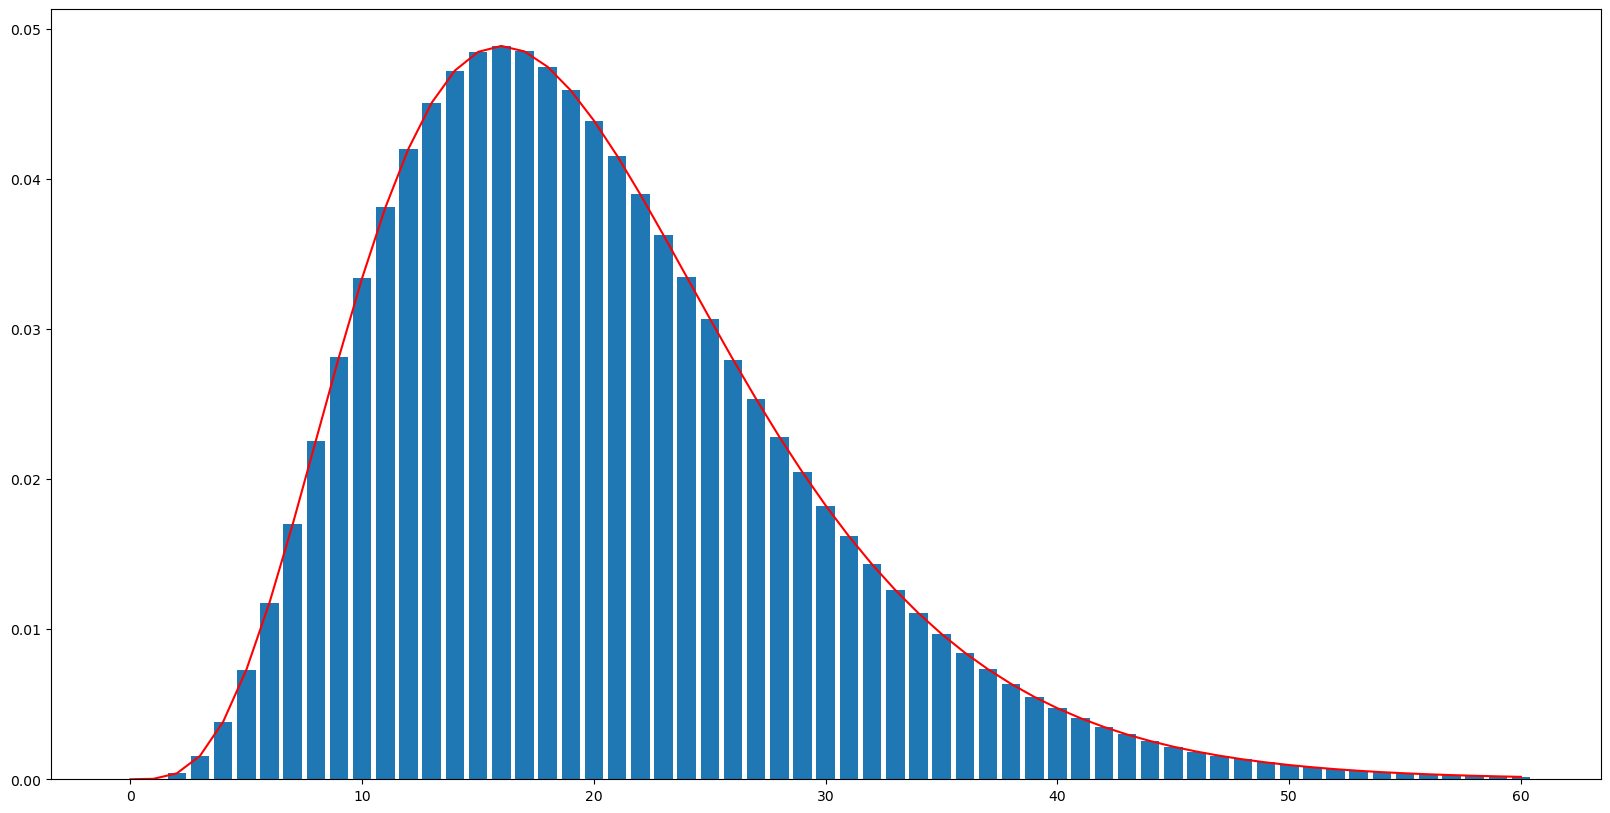

In [22]:
### use example of airplanes
## on average an airplane comes every 4 hour
# lamda = rate of ouccurance = 1 in 4 hour = 0.25 in an hour
# list of probabilities for y-axis
problist = []
# list of number of interval for x-axis
xlist = []
# rate of success in each interval
lamda = 0.25
# 5 events occur
k = 5
# compute time from 0 hour to 60 hours
for i in range(0,61):
    # x = number of hours
    x = i
    # add to xlist
    xlist.append(x)
    # calculate the probability and add to list
    problist.append(((lamda**k)*(x**(k-1))*exp((-lamda)*x))/factorial(k-1))

# print result
print("max probability",max(problist))
print("probability peak at x =",problist.index(max(problist)))
print("sum of all probability =",sum(problist))

# plot
plt.figure(figsize=(20,10))
plt.bar(xlist,problist)
plt.plot(problist,color="red")
plt.show()

This distribution works similar to an exponential distribution, we can use cumulative distribution function to crate an insightful graph

**$P(X≤t) = 1 - \sum_{n=0}^{k-1} \frac{1}{n!} e^{-λt}(λt)^{n}$**

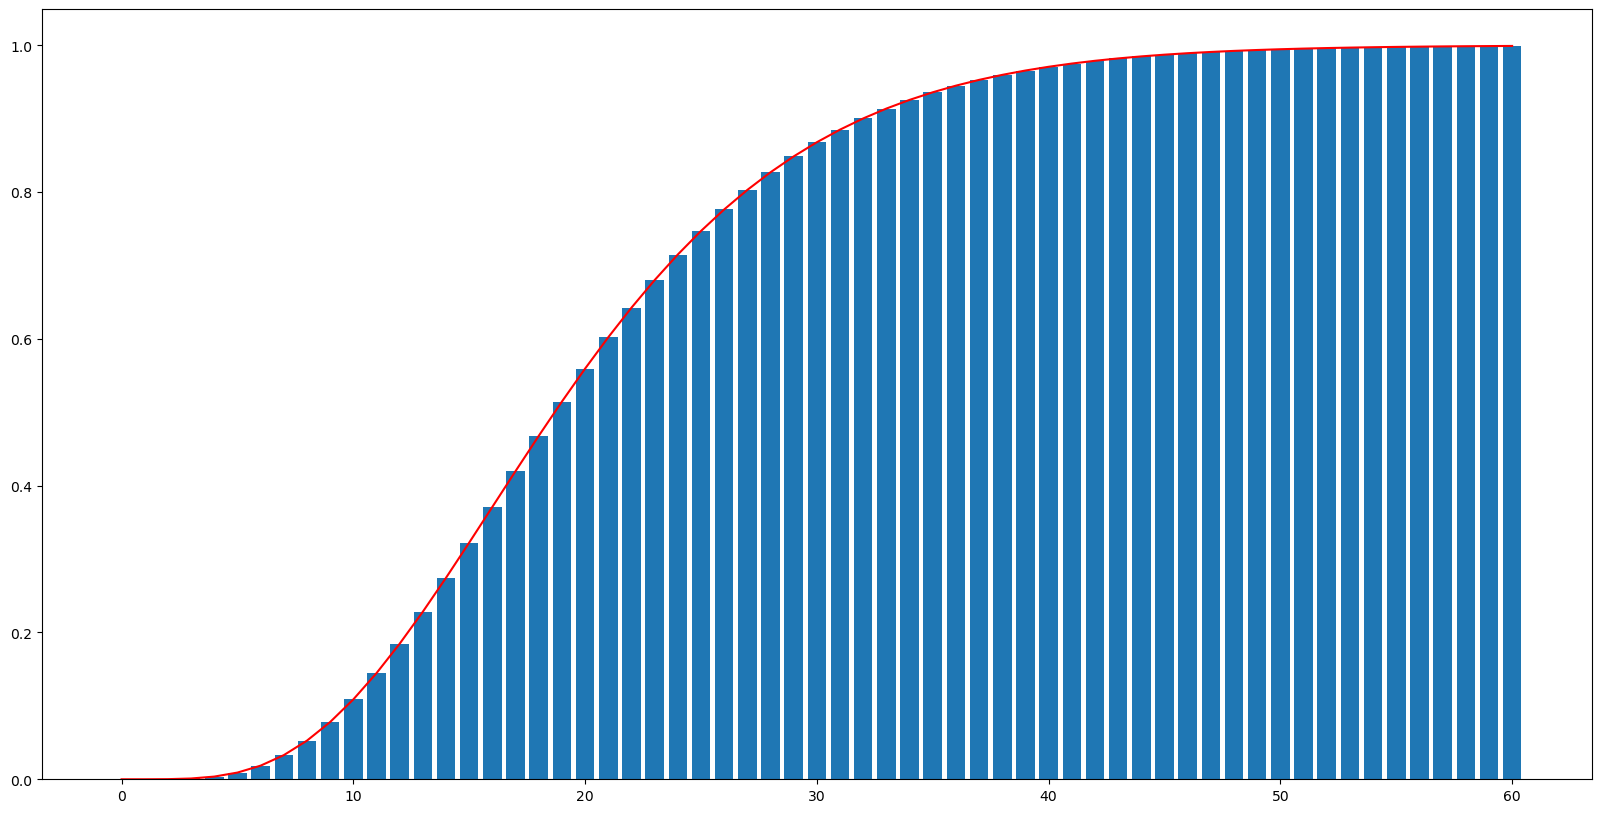

In [23]:
### use example of airplanes
## on average an airplane comes every 4 hour
# lamda = rate of ouccurance = 1 in 4 hour = 0.25 in an hour
# list of probabilities for y-axis
problist = []
# list of number of interval for x-axis
xlist = []
# rate of success in each interval
lamda = 0.25
# 5 events occur
k = 5
# compute time from 0 hour to 60 hours
for i in range(0,61):
    # x = number of hours
    x = i
    # add to xlist
    xlist.append(x)
    # create probability placeholder
    prob = 0
    for n in range(k):
        # summation part (sigma part)
        prob += (((lamda*x)**n)*exp((-lamda)*x))/factorial(n)
    # calculate the probability and add to list
    problist.append(1-prob)
    
# plot
plt.figure(figsize=(20,10))
plt.bar(xlist,problist)
plt.plot(problist,color="red")
plt.show()

Even though the equation looks complicated, it provides a flexible calculation.